<a href="https://colab.research.google.com/github/moon11boon/moon11boon/blob/main/Copy_of_MakeupBrandRecommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Makeup Brand Recommendation System

A recommendation system predicts the user's preference or rating for makeup brands based on their previous ratings or preferences.

In [1]:

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import random
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model




warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

num_users = 55
num_brands = 5

#random usr IDs and makeup brand IDs
user_ids = [random.randint(1001, 1100) for _ in range(num_users)]
brand_ids = [random.randint(1, num_brands) for _ in range(num_users)]


ratings = [round(random.uniform(1, 5), 1) for _ in range(num_users)]

In [3]:


data = {
    'User_ID': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    'Makeup_Brand_ID': [1, 2, 3, 4, 1, 2, 3, 4, 5, 1],
    'User_Rating': [4.5, 3.8, 4.2, 4.0, 4.7, 3.5, 4.8, 3.9, 4.6, 4.4],
    'User_Preference': [
        'MAC Cosmetics', 'Urban Decay', 'Fenty Beauty', 'NARS Cosmetics',
        'MAC Cosmetics', 'Urban Decay', 'Fenty Beauty', 'NARS Cosmetics',
        'Anastasia Beverly Hills', 'MAC Cosmetics'
    ]
}

makeup_ratings_df = pd.DataFrame(data)


print(makeup_ratings_df)

   User_ID  Makeup_Brand_ID  User_Rating          User_Preference
0     1001                1          4.5            MAC Cosmetics
1     1002                2          3.8              Urban Decay
2     1003                3          4.2             Fenty Beauty
3     1004                4          4.0           NARS Cosmetics
4     1005                1          4.7            MAC Cosmetics
5     1006                2          3.5              Urban Decay
6     1007                3          4.8             Fenty Beauty
7     1008                4          3.9           NARS Cosmetics
8     1009                5          4.6  Anastasia Beverly Hills
9     1010                1          4.4            MAC Cosmetics


In [4]:

makeup_ratings_df.to_csv('makeup_ratings.csv', index=False)

In [5]:
dataset = pd.read_csv('makeup_ratings.csv')

dataset.head()

#check shape of dataset just because
dataset.shape

(10, 4)

In [6]:
#split dataset into training set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [7]:
train.head()

,User_ID,Makeup_Brand_ID,User_Rating,User_Preference
5,1006,2,3.5,Urban Decay
0,1001,1,4.5,MAC Cosmetics
7,1008,4,3.9,NARS Cosmetics
2,1003,3,4.2,Fenty Beauty
9,1010,1,4.4,MAC Cosmetics


In [8]:
test.head()

,User_ID,Makeup_Brand_ID,User_Rating,User_Preference
8,1009,5,4.6,Anastasia Beverly Hills
1,1002,2,3.8,Urban Decay


Getting the number of unique users and makeup brands

In [9]:

n_users = len(dataset.User_ID.unique())

n_users

n_brands = len(dataset.Makeup_Brand_ID.unique())
n_brands

5

In [10]:

n_users = len(dataset.User_ID.unique())

n_brands = len(dataset.Makeup_Brand_ID.unique())


brand_input = Input(shape=[1], name="Brand-Input")

brand_embedding = Embedding(n_brands+1, 5, name="Brand-Embedding")(brand_input)

brand_vec = Flatten(name="Flatten-Brands")(brand_embedding)


user_input = Input(shape=[1], name="User-Input")

user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)

user_vec = Flatten(name="Flatten-Users")(user_embedding)


prod = Dot(name="Dot-Product", axes=1)([brand_vec, user_vec])

model = Model([user_input, brand_input], prod)

model.compile('adam', 'mean_squared_error')

In [11]:
brand_input = Input(shape=[1], name="Brand-Input")

brand_embedding = Embedding(n_brands+1, 10, name="Brand-Embedding")(brand_input)  # Increased embedding dimensions to 10

brand_vec = Flatten(name="Flatten-Brands")(brand_embedding)


user_input = Input(shape=[1], name="User-Input")

user_embedding = Embedding(n_users+1, 10, name="User-Embedding")(user_input)  # Increased embedding dimensions to 10

user_vec = Flatten(name="Flatten-Users")(user_embedding)

In [12]:
pip install --upgrade tensorflow

In [13]:
import tensorflow as tf
import keras

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.14.0
Keras version: 2.14.0


In [14]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [15]:
user_embedding = Embedding(n_users+1, 10, name="User-Embedding")(user_input)
brand_embedding = Embedding(n_brands+1, 10, name="Brand-Embedding")(brand_input)

In [16]:

brand_input = Input(shape=[1], name="Brand-Input")
user_input = Input(shape=[1], name="User-Input")

brand_embedding = Embedding(n_brands+1, 10, name="Brand-Embedding")(brand_input)
user_embedding = Embedding(n_users+1, 10, name="User-Embedding")(user_input)

brand_vec = Flatten(name="Flatten-Brands")(brand_embedding)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([brand_vec, user_vec])

model = Model([user_input, brand_input], prod)
model.compile('adam', 'mean_squared_error')

In [17]:

train['User_ID'] = train['User_ID'] - train['User_ID'].min() + 1
train['Makeup_Brand_ID'] = train['Makeup_Brand_ID'] - train['Makeup_Brand_ID'].min() + 1
test['User_ID'] = test['User_ID'] - test['User_ID'].min() + 1
test['Makeup_Brand_ID'] = test['Makeup_Brand_ID'] - test['Makeup_Brand_ID'].min() + 1

Epoch 1/5
1/1 [==============================] - 1s 558ms/step - loss: 18.2241
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 18.2208
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 18.2175
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 18.2141
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 18.2107


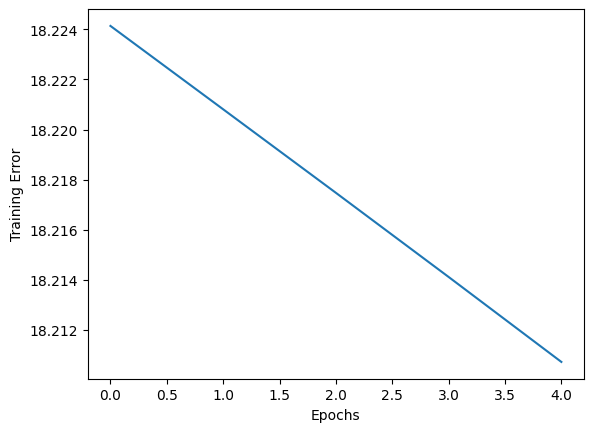

In [18]:

if os.path.exists('makeup_regression_model.h5'):
    model = load_model('makeup_regression_model.h5')
else:

    brand_input = Input(shape=[1], name="Brand-Input")
    user_input = Input(shape=[1], name="User-Input")

    brand_embedding = Embedding(n_brands+1, 10, name="Brand-Embedding")(brand_input)
    user_embedding = Embedding(n_users+1, 10, name="User-Embedding")(user_input)

    brand_vec = Flatten(name="Flatten-Brands")(brand_embedding)
    user_vec = Flatten(name="Flatten-Users")(user_embedding)

    prod = Dot(name="Dot-Product", axes=1)([brand_vec, user_vec])

    model = Model([user_input, brand_input], prod)
    model.compile('adam', 'mean_squared_error')


    history = model.fit([train.User_ID, train.Makeup_Brand_ID], train.User_Rating, epochs=5, verbose=1)


    model.save('makeup_regression_model.h5')

    # Plot the training error
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [19]:
history = model.fit([train.User_ID, train.Makeup_Brand_ID], train.User_Rating, epochs=5, verbose=1, batch_size=64)

Epoch 1/5
1/1 [==============================] - 0s 9ms/step - loss: 18.2073
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 18.2038
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 18.2002
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 18.1966
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 18.1929


In [20]:
test_loss = model.evaluate([test.User_ID, test.Makeup_Brand_ID], test.User_Rating)
print(f"Test Loss: {test_loss}")

1/1 [==============================] - 0s 220ms/step - loss: 17.7492
Test Loss: 17.749170303344727


In [21]:
user_id = 1
brand_ids = [1, 2, 3, 4, 5]
predictions = model.predict([np.array([user_id] * len(brand_ids)), np.array(brand_ids)])

1/1 [==============================] - 0s 142ms/step


In [22]:
user_id = 1
all_brand_ids = [1, 2, 3, 4, 5]
user_brand_ids = train[train['User_ID'] == user_id]['Makeup_Brand_ID'].unique()  # Brands already rated by the user

#filtering out brands
brand_ids_to_recommend = [brand_id for brand_id in all_brand_ids if brand_id not in user_brand_ids]

#predicting ratings
predictions = model.predict([np.array([user_id] * len(brand_ids_to_recommend)), np.array(brand_ids_to_recommend)])


brand_ratings = list(zip(brand_ids_to_recommend, predictions))


recommended_brands = sorted(brand_ratings, key=lambda x: x[1], reverse=True)


top_n_recommendations = recommended_brands[:5]

print(f"Top 5 recommended brands for user {user_id}:")
for brand_id, rating in top_n_recommendations:
    print(f"Brand ID: {brand_id}, Predicted Rating: {rating}")

1/1 [==============================] - 0s 25ms/step
Top 5 recommended brands for user 1:
Brand ID: 2, Predicted Rating: [0.00404464]
Brand ID: 3, Predicted Rating: [0.00290522]
Brand ID: 5, Predicted Rating: [0.00056846]
Brand ID: 4, Predicted Rating: [-0.00196197]
